# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

2. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la trasnformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.




In [ ]:
### Librerias ###
import numpy as np
import pandas as pd
import sympy as sp
import scipy as sc
from scipy import misc
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.interpolate import CubicSpline

### 1) ###
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route,";")

df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})

#Verificamos los valores de los angulos
valor1=df["AnguloDeg"].values[0]
print(valor1)
print(df["AnguloDeg"].values)
print("-----------------------------------------------------")

#Cambiamos los valores de str a float 
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",",".").astype("float64")
print(df["AnguloDeg"])
type(df["AnguloDeg"])
print("-----------------------------------------------------")

#Creamos una nueva columna llamada "AnguloRad"
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )
df["AnguloRad"] = df["AnguloRad"] - np.pi/2
print(df["AnguloRad"])
print("-----------------------------------------------------")


59,289611816406
['59,289611816406' '59,9823265075684' '61,2374534606934' ...
 '97,9406890869141' '99,3180923461914' '100,637817382813']
-----------------------------------------------------
0        59.289612
1        59.982327
2        61.237453
3        63.492477
4        65.388771
           ...    
2842     94.937576
2843     96.479851
2844     97.940689
2845     99.318092
2846    100.637817
Name: AnguloDeg, Length: 2847, dtype: float64
-----------------------------------------------------
0      -0.535997
1      -0.523907
2      -0.502001
3      -0.462644
4      -0.429547
          ...   
2842    0.086177
2843    0.113095
2844    0.138591
2845    0.162631
2846    0.185665
Name: AnguloRad, Length: 2847, dtype: float64
-----------------------------------------------------


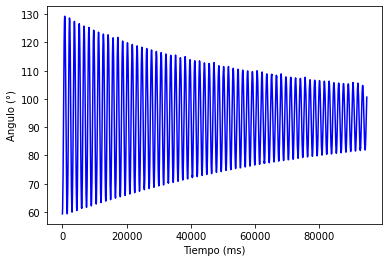

In [ ]:
### 2) ### 
plt.figure()
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Angulo (°)")
plt.show()

Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44
0.6715600030592099


(0.25, 1.0)

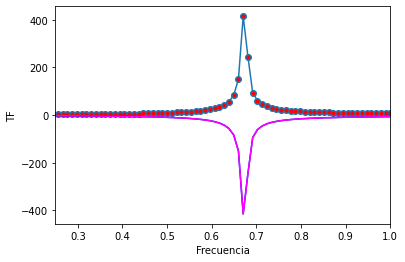

In [ ]:
### 3) ###

#Aplicamos la transformada de Fourier
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]
 
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

#Realizamos una interpolación
cs = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2])) 


#Hallamos el maximo
min = optimize.fmin_powell(cs, 0.2)
abs(cs(min))
print(min)

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), -abs(cs(xf[1:N//2])),"b" ) 
plt.plot(abs(xf[1:N//2]),cs(abs(xf[1:N//2])),color="magenta")
plt.xlim(0.25, 1)


El valor donde la frecuencia es maxima es: 0.6726099395760682
Y su valor en frecuencia es :              414.44966601144046



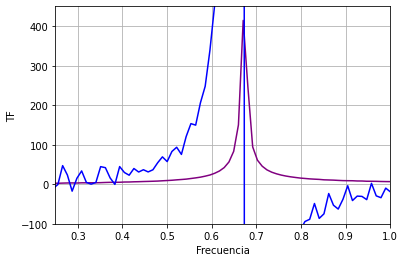

In [ ]:
#Hallar el maximo derivando 
csx = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2])) 

#Vectorizamos la funcion de derivada 
array_derivate=np.vectorize(misc.derivative)

#Hallamos la derivada
csp = array_derivate(csx,xf[1:N//2],dx=1E-14)

#Hacemos una interpolación con la derivada
cs1 = CubicSpline(xf[1:N//2], csp) 

#hallamos el punto en el cual la derivada se hace 0 
max = optimize.bisect(cs1,0.6,0.7)

#Impresiones
print("""
El valor donde la frecuencia es maxima es: {}
Y su valor en frecuencia es :              {}
""".format(max,csx(max)))

#Gráfico 
plt.figure()
plt.plot(xf[1:N//2],np.abs(csx(xf[1:N//2])),color="purple")
plt.plot(abs(xf[1:N//2]), csp,"b")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.grid()
plt.ylim(-100,450)
plt.xlim(0.25, 1)
plt.show()